# Grade: /100 pts

# Assignment 05: Model Selection & Cross Validation

In this assignment you will be using a #TidyTuesday dataset on Spotify songs to build a classification model for predicting Spotify song popularity.

The dataset has already been preprocessed, and is ready to be used! 

The Spotify songs dataset has provided you with data for 30947 Spotify songs.  Your job: build a model or models, perform model selection using cross validation techniques, and evaluate your final selected model.

### The Dataset

The data is stored in a csv file called `spotify_pre.csv`.  The data includes some information about playlist genre, playlist subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration. The target variable is `track_popularity`, which has two categories `high` and `low`.


### Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline. 

5.  Your submission document should be saved in the form: `LastName_FirstName_Assignment5.ipynb`

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error,roc_curve, auc, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
%matplotlib inline

_____

### Question 1: /15pts

First, import the dataset `spotify_pre.csv` as a dataframe and print out a few rows and get metadata of the csv file to have a rough understanding of the type of each column.

In [2]:
# Import the dataset etc.
data = pd.read_csv('/content/spotify_pre.csv')
print(data[1000:1010])

     track_popularity playlist_genre playlist_subgenre  danceability  energy  \
1000              low            pop         dance pop         0.661   0.742   
1001              low            pop         dance pop         0.712   0.659   
1002              low            pop         dance pop         0.662   0.838   
1003              low            pop         dance pop         0.703   0.885   
1004              low            pop         dance pop         0.558   0.713   
1005              low            pop         dance pop         0.743   0.782   
1006              low            pop         dance pop         0.697   0.687   
1007              low            pop         dance pop         0.787   0.652   
1008              low            pop         dance pop         0.702   0.758   
1009              low            pop         dance pop         0.744   0.850   

      key  loudness   mode  speechiness  acousticness  instrumentalness  \
1000    7    -5.588  major       0.1730     

Finally create a barchart of playlist_subgenre with each bar showing the proportion of track_popularity categories (use ggplot with 'fill' option set to 'track_popularity'). Make sure to flip cartesian coordinates so that horizontal becomes vertical, and vertical, horizontal.

**Make sure to check out some online resources for plotting with ggplot in Python**

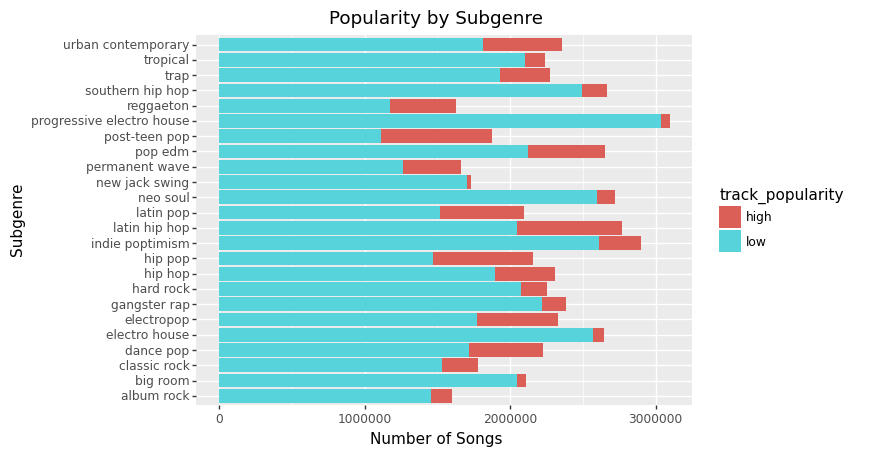

<ggplot: (8759366057262)>

In [3]:
# Code to construct the barchart
(ggplot(data = data,mapping=aes(x = 'playlist_subgenre', y=data['playlist_subgenre'].value_counts()[0], fill = 'track_popularity'))
+ geom_bar(stat='identity')
+ coord_flip()
+ labs(title = "Popularity by Subgenre", x = "Subgenre", y = "Number of Songs")
)


Which category of playlist_subgenre is more likely to gain popularity?

The one to most likely gain popularity is latin hip hop as it has a high number of songs in this genre and alot of them have high popularity. Making there alot more music available for fans to enjoy.

_____________

### Question 2: /10pts


Now, you will create boxplots with x axis set to `playlist_genre` and y axis set to `instrumentalness` and color option set to `track_popularity`. Make sure to change the y axis scale into log10 scale for a better representation.

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 11500 rows containing non-finite values.


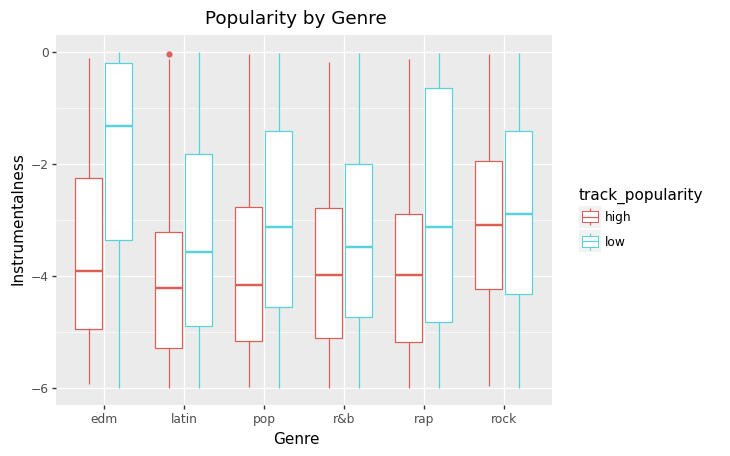

<ggplot: (8759363919117)>

In [4]:
## Your code
(ggplot(data = data, mapping = aes(x = 'playlist_genre', y = np.log10(data['instrumentalness']), color = 'track_popularity')) +
  geom_boxplot()+
  labs(title = "Popularity by Genre", x = "Genre", y = "Instrumentalness"))

With track_popularity taken into account, does instrumentalness score differ within some of playlist genres?
In edm having higher popularity with low instrumentality although alot of it is high instrumentality, simalarily so with rap. Overall though lower intrsumentality means higher popularity except in rock, where its pretty even.

**ANSWER HERE**

___________

### Question 3: /10

Create a basic logistic regression model (with default penalization) named `model1`. You need to create a model pipeline to be fit later. (Use `solver='lbfgs'`, `max_iter=10000` and `random_state=0`)

The predictor variables are `mode`, and `loudness`. Use the following chunk of code. You will use `Data1` to build your model.

In [5]:

# Your code
# Hints:
Data1 = data[['track_popularity', 'mode', 'loudness']] 
Data1 = pd.get_dummies(Data1, drop_first=True) 
Data1 = Data1.rename({'track_popularity_low': 'track_popularity','mode_minor' :'mode'}, axis='columns')
model1 = Pipeline([('classifier', LogisticRegression(random_state=0,solver='lbfgs', max_iter=10000))])




Now that you have created the pipeline, fit `model1` for predicting the target variable, track_popularity, with the two predictors. Use a 70/30 train-test split of the data, remember to set `random_state=0` in the function `train_test_split`. After that, evaluate this model plotting the ROC curve and reporting the AUC value. 

In [6]:
np.random.seed(0)
np.random.rand(5)
# Create the training and test data
d_train, d_test = train_test_split(Data1, test_size=0.3, random_state=0)
#Fit the model
relLnM = model1.fit(Data1.drop('track_popularity', axis = 1),Data1['track_popularity'])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



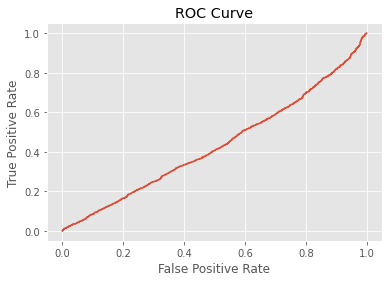

The AUC value is:  0.4332322296950778


In [7]:
# Create the ROC curve and report AUC
def ROC_Val(X, y, model):
  auc_val = roc_auc_score(y, model.predict_proba(X)[:, 1])
  fpr, tpr, thresholds = roc_curve(y, model.predict_log_proba(X)[:, 1], pos_label=1)
  return fpr, tpr, thresholds, auc_val
def plotROC(fpr,tpr, auc_val):
  plt.plot(fpr,tpr)
  plt.title("ROC Curve")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  print('The AUC value is: ', auc_val)
fpr1, tpr1, thresholds1, auc_val1 = (ROC_Val(d_test[['mode', 'loudness']],d_test['track_popularity'], relLnM))
plotROC(fpr1,tpr1, auc_val1)

At this point, would you use the baseline model as your final model? Why or why not?

No i wouldn't use this as the curve is too flat and almost linear, making it a poor model. Plus with the AUC not being showing no discrimination ultimately almost as good as guessing 50/50

**ANSWER HERE**

____________

### Question 4: /40

Here, we want to determine the best single numeric feature model to predict the track_popularity. To be specific, you are going to create a model per each predictor: 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_m'. Make sure to use the cross-validation technique to make your decision. Please make sure to use 'pd.get_dummies(, drop_first=True)' to encode the target variable, and change the column name 'track_popularity_low' to 'track_popularity', as in previous question.

You remember that *cross-validation* technique is used to find the expected test error of the models. In addition, in the next code, 5 different folds are displayed using 5 fold cross-validation. In this case it is used `StratifiedKFold()` function.

#### 4.1: /5
**Define a function `AUC_calculation` with inputs `(X, y, index_train, index_test)`  which calculates the AUC of the `model1` trained on `index_train` and tested on `index_test`.**

In [8]:
# Your code
# Hints:
#str_kf = StratifiedKFold(n_splits=5) for j, (index_train, index_test) in enumerate(str_kf.split(X,y)):
def AUC_calculation(X,y, index_train, index_test):
  X_train, X_test = X.iloc[index_train], X.iloc[index_test]
  y_train, y_test = y.iloc[index_train], y.iloc[index_test]
  m = model1.fit(X_train,y_train)
  fpr, tpr, thresholds, auc_val = ROC_Val(X_test,y_test, m)
  return auc_val


##enumerate has the index and the elements in the folds
##print(k, (index_train, index_test))
#plt.plot(index_train, [j+1 for s in index_train], '.')
#plt.title('Cross Validation ')

#### 4.2: /8
**Using `AUC_calculation` create a function named `AUC_cross_validation` which has as input (X, y, n_fold). `AUC_cross_validation` does a `n_fold` cross validation (using `StratifiedKFold`) and its output should be a list with the AUC for each fold.** 

In [9]:
# Your code
def AUC_cross_validation(X, y, n_fold = 5):
  str_kf = StratifiedKFold(n_splits= n_fold)
  auc = []
  for j, (index_train, index_test) in enumerate(str_kf.split(X,y)):
    auc.append(AUC_calculation(X,y, index_train, index_test))
  return auc
AUC_cross_validation(Data1.drop('track_popularity', axis = 1),Data1['track_popularity'])

[0.6233545391731048,
 0.5618405796303647,
 0.5102366549697298,
 0.7123146965403496,
 0.40690576053743915]

#### 4.3: /5
**Now you are ready to estimate and compare through cross validation the performance of all the *simple models* that only use one numeric predictor as input. Prepare you dataset here!**

In [10]:
# Your code
Data = data.drop(['playlist_genre', 'playlist_subgenre', 'mode'], axis = 1)
Data = pd.get_dummies(Data, drop_first=True) 
Data = Data.rename({'track_popularity_low': 'track_popularity'}, axis='columns')
X_Data = Data.drop('track_popularity', axis = 1)
y_Data = Data['track_popularity']



#### 4.4: /8

**Use your function `AUC_cross_validation` to compute cross-validation estimates of the AUC for each single numeric feature model, use a data frame (named `AUC_models`) to report the AUC value for each fold and each of the models. (Use `n_fold=10`).**

**The column names of `AUC_models` have to be in the form `Simple-numeric predictor variable`, e.g., `simple-tempo`.**

In [11]:
# Construct AUC_models dataframe
AUC_models = pd.DataFrame()
for features in X_Data:
  X = X_Data[[features]]
  AUC_models['simple-' + features] = AUC_cross_validation(X, y_Data, n_fold = 10)

In [12]:
# Print AUC_models dataframe 
print(AUC_models)

   simple-danceability  simple-energy  simple-key  simple-loudness  \
0             0.555868       0.607359    0.481996         0.553269   
1             0.487477       0.357881    0.529757         0.709963   
2             0.464991       0.579237    0.516969         0.528699   
3             0.751291       0.553775    0.457959         0.624714   
4             0.469592       0.568940    0.527370         0.435774   
5             0.458676       0.552932    0.514861         0.585892   
6             0.643550       0.394638    0.487751         0.745097   
7             0.527566       0.446832    0.513050         0.690803   
8             0.580350       0.867400    0.518115         0.338044   
9             0.542105       0.674315    0.495095         0.468274   

   simple-speechiness  simple-acousticness  simple-instrumentalness  \
0            0.458888             0.597392                 0.631633   
1            0.418472             0.370703                 0.663520   
2            0.2

#### 4.5: /7

**Decide which of the studied models has the best and the worst performance, using a boxplot (without presenting outliers) that shows the distribution of the previous AUC scores for every model.** (Do not forget labels!)

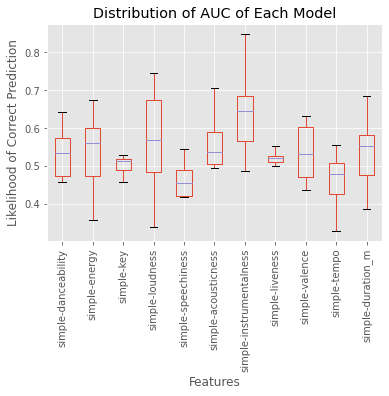

In [13]:
# Code to plot the boxplots organized as required
AUC_models.boxplot(showfliers=False)
plt.title("Distribution of AUC of Each Model")
plt.xlabel('Features')
plt.ylabel('Likelihood of Correct Prediction')
plt.xticks(rotation=90)
plt.show()

**ANSWER HERE:**
The best performance was by instrumentalness as ut shows a positive corrolations, and the worst is key as it doesnt show either a strong positive or negative corrolation

> Indented block



#### 4.6: /7
**Now, lets compare these models with the one including all the numeric variables** 

**You again will use  10-fold cross-validation to determine if this new model has better performance, and at the end, you want to plot the boxplots with the information of this new model.**  

In [14]:
# Your code
AUC_models['numeric'] = AUC_cross_validation(X_Data, y_Data, n_fold = 10)

# Print the new data frame 
print(AUC_models)

   simple-danceability  simple-energy  simple-key  simple-loudness  \
0             0.555868       0.607359    0.481996         0.553269   
1             0.487477       0.357881    0.529757         0.709963   
2             0.464991       0.579237    0.516969         0.528699   
3             0.751291       0.553775    0.457959         0.624714   
4             0.469592       0.568940    0.527370         0.435774   
5             0.458676       0.552932    0.514861         0.585892   
6             0.643550       0.394638    0.487751         0.745097   
7             0.527566       0.446832    0.513050         0.690803   
8             0.580350       0.867400    0.518115         0.338044   
9             0.542105       0.674315    0.495095         0.468274   

   simple-speechiness  simple-acousticness  simple-instrumentalness  \
0            0.458888             0.597392                 0.631633   
1            0.418472             0.370703                 0.663520   
2            0.2

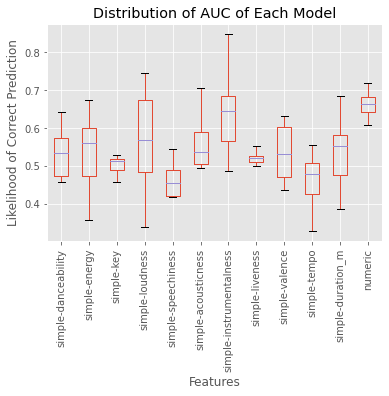

In [15]:
# Plot the boxplots
AUC_models.boxplot(showfliers=False)
plt.title("Distribution of AUC of Each Model")
plt.xlabel('Features')
plt.ylabel('Likelihood of Correct Prediction')
plt.xticks(rotation=90)
plt.show()

_____________

### Question 5: /10

Finally, you are going to include all the numeric predictors as well as the categorical variable `mode` in the model. Make sure to encode the categorical variable. Use the 10-fold cross-validation to evaluate the performance of this model. Print the AUC mean for all the models (including previous models) in ascending order.

In [16]:
# Your code
DataM = X_Data
DataM['mode']=pd.get_dummies(data['mode'], drop_first=True)
AUC_models['modeInc'] = AUC_cross_validation(DataM, y_Data, n_fold = 10)

# Print the new data frame 

In [17]:
# Print the AUC mean for each of the models in ascending order
print( (AUC_models.mean().sort_values()))

simple-speechiness         0.432759
simple-tempo               0.460445
simple-key                 0.504292
simple-liveness            0.524621
simple-duration_m          0.532453
simple-valence             0.535569
simple-danceability        0.548147
simple-energy              0.560331
simple-acousticness        0.562292
simple-loudness            0.568053
simple-instrumentalness    0.633427
modeInc                    0.659950
numeric                    0.660236
dtype: float64


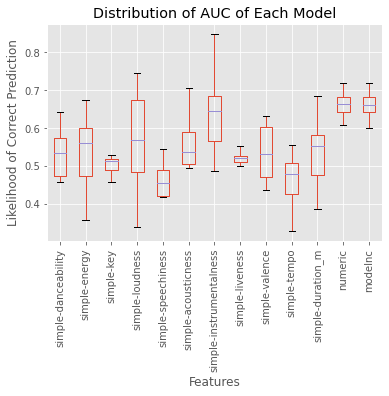

In [18]:
AUC_models.boxplot(showfliers=False)
plt.title("Distribution of AUC of Each Model")
plt.xlabel('Features')
plt.ylabel('Likelihood of Correct Prediction')
plt.xticks(rotation=90)
plt.show()

Which of the above models is the best model? Why? 

**ANSWER HERE:**
The best model is the one that is numer or mode included as they have the highest mean ROC AUC which is corrolated with how good the algorithm is at predicting

______________

### Question 6: /15pts

Now it is time to train it on all the training data. Estimate the performance of this model on the test data and do the following (For this, use a 70/30 train-test split of the data, remember to set `random_state=0` in the function `train_test_split` ): 

- Use boostrap technique to find the 95% CI for the AUC. 
- Plot the distribution of the boostrap AUC scores.

In [19]:
# Your code
fData = pd.get_dummies(data, drop_first=True) 
fData = fData.rename({'track_popularity_low': 'track_popularity'}, axis='columns')
d_train, d_test = train_test_split(fData, test_size=0.3, random_state=0)
fModel = model1.fit(d_train.drop('track_popularity', axis = 1), d_train["track_popularity"])

In [20]:
rocAUC = ROC_Val(d_test.drop('track_popularity', axis = 1), d_test["track_popularity"], fModel)[3]

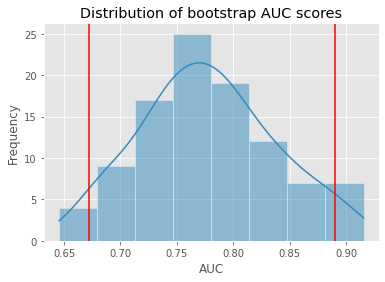

In [21]:
def bootStrapStat(model, data, numboot=100):
    bstat = []
    i = 0
    while i<numboot:
      sample = data.sample(numboot,replace=True)
      bstat.append(roc_auc_score(sample['track_popularity'], model.predict_proba(sample.drop('track_popularity', axis = 1))[:,1]))
      i+=1
    return (bstat)
bootStat = bootStrapStat(fModel,fData)
ci_low = np.percentile(bootStat, 2.5)
ci_high = np.percentile(bootStat, 97.5)
sns.histplot(bootStat, kde=True)
plt.axvline(x=ci_low, color='red')
plt.axvline(x=ci_high, color='red')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.title('Distribution of AUC')
plt.show()

Is the test AUC close to the AUC cross validation of the model you chose? Why do you think this is the case?

No its not as the median is around 77.5 and the 2nd 67.5 and 3rd around 87.5 almost a gain of 0.1 all arround

[link text](https://)**ANSWER HERE:** 
No its not as the median is around 77.5 and the 2nd 67.5 and 3rd around 87.5 almost a gain of 0.1 all arround